In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

### 1. Resample raster files

In [2]:
# import class to handle raster files
from gempy.utils import create_topography

#### example tif file

pass geo_model to directly crop the DEM to the grid extent
depending on the size of the raster, this can take forever
storing converted file...
raster extent:  [440720 471440  69280 100000]
raster resolution:  [512 512]
Pixel X Size:  60.0 Pixel Y Size: -60.0


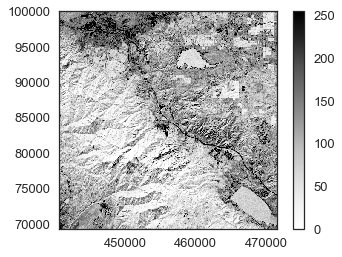

In [3]:
fp = os.pardir+"/data/input_data/tut-ch1-7/bogota.tif"
# create DEM_GDAL object
topo = create_topography.Load_DEM_GDAL(fp)
topo.info()

#### the same file, but as xyz

pass geo_model to directly crop the DEM to the grid extent
depending on the size of the raster, this can take forever
storing converted file...
raster extent:  [440720 471440  69280 100000]
raster resolution:  [512 512]
Pixel X Size:  60.0 Pixel Y Size: -60.0


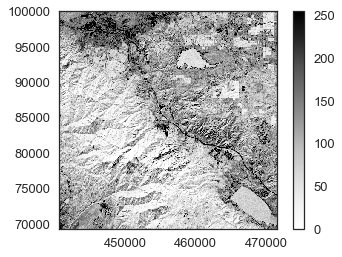

In [4]:
fpxyz = os.pardir+"/data/input_data/tut-ch1-7/bogota.xyz"
topo = create_topography.Load_DEM_GDAL(fpxyz)
topo.info()

#### Resample grid to make it coarser

In [5]:
save_path='bogota_coarse.tif' # define path
topo.resample(new_xres=300,new_yres=300, save_path=save_path)

current pixel xsize: 60.0 current pixel ysize: 60.0
new pixel xsize: 300.0 new pixel ysize: 300.0
file saved in bogota_coarse.tif


pass geo_model to directly crop the DEM to the grid extent
depending on the size of the raster, this can take forever
storing converted file...
raster extent:  [440720 471320  69400 100000]
raster resolution:  [102 102]
Pixel X Size:  300.0 Pixel Y Size: -300.0


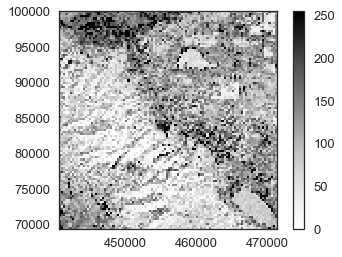

In [6]:
# open resampled raster file 
topo_res = create_topography.Load_DEM_GDAL(save_path)
topo_res.info()

#### Use resampled raster file in gempy model

In [7]:
geo_model = gp.create_model('Single_layer_topo')

gp.init_data(geo_model, extent=[450000, 460000, 70000,80000,-1000,500],resolution = (50,50,50),
                         path_i = os.pardir+"/data/input_data/tut-ch1-7/onelayer_interfaces.csv",
                         path_o = os.pardir+"/data/input_data/tut-ch1-7/onelayer_orient.csv")
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

Active grids: ['regular']


,surface,series,order_surfaces,isBasement,color,id
0,layer1,series,1,False,#ff8000,1
1,basement,series,2,True,#88cc60,2


Cropped raster to geo_model.grid.extent.
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 4.50100000e+05,  7.01000000e+04, -9.85000000e+02],
       [ 4.50100000e+05,  7.01000000e+04, -9.55000000e+02],
       [ 4.50100000e+05,  7.01000000e+04, -9.25000000e+02],
       ...,
       [ 4.59242424e+05,  7.98484848e+04,  1.48000000e+02],
       [ 4.59545455e+05,  7.98484848e+04,  1.15000000e+02],
       [ 4.59848485e+05,  7.98484848e+04,  5.80000000e+01]])

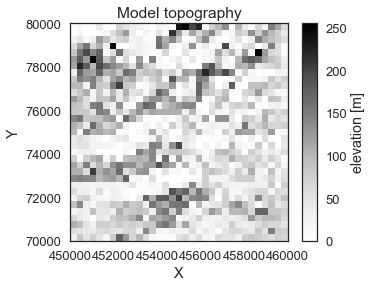

In [8]:
geo_model.set_topography(source='gdal',filepath=save_path)

##### Note:
when setting a tiff with the set_topography function, the raster is automatically cropped to the extent of the geomodel (This is the reason why the resolution looks much lower)

#### Use xyz file in gempy model
all file formats that can be read by gempy can be found on https://gdal.org/drivers/raster/index.html

Cropped raster to geo_model.grid.extent.
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 4.50100000e+05,  7.01000000e+04, -9.85000000e+02],
       [ 4.50100000e+05,  7.01000000e+04, -9.55000000e+02],
       [ 4.50100000e+05,  7.01000000e+04, -9.25000000e+02],
       ...,
       [ 4.59850299e+05,  7.99700599e+04,  8.20000000e+01],
       [ 4.59910180e+05,  7.99700599e+04,  9.90000000e+01],
       [ 4.59970060e+05,  7.99700599e+04,  6.60000000e+01]])

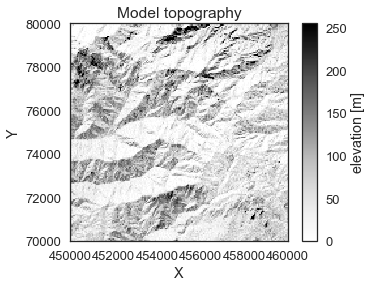

In [10]:
fpxyz = os.pardir+"/data/input_data/tut-ch1-7/bogota.xyz"
geo_model.set_topography(source='gdal',filepath=fpxyz)